In [105]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [106]:
data = pd.read_csv("credit.csv")

In [107]:
data.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [108]:
data.shape

(400, 12)

In [109]:
# remove the duplicate 
data.drop_duplicates()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [110]:
# Handling the missing values
data.isnull().sum()

ID           0
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [111]:
# Drop the Customer ID 
data.drop(['ID'],axis=1,inplace=True)

In [112]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [113]:
# Separate features and target
xtrain = data.drop('Balance', axis=1) 
ytrain = data['Balance']              

In [114]:
xtrain.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,104.593,7075,514,4,71,11,Male,No,No,Asian
3,148.924,9504,681,3,36,11,Female,No,No,Asian
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian


In [115]:
# Assuming xtrain and ytrain are your input features and labels
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=123)

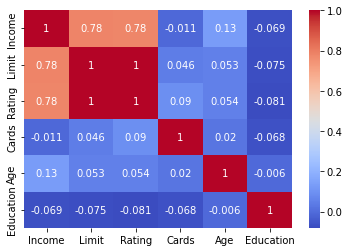

In [116]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64'])

# Assuming you have a DataFrame called df
corr = numerical_cols.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [117]:
# Handling the Categorical Variable
X_train.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
dtype: object

In [118]:
categorical_cols = X_train.select_dtypes(include=['object'])
numerical_cols = X_train.select_dtypes(include=['int64', 'float64'])

# Create dummy variables
X_train = pd.get_dummies(X_train, columns=categorical_cols.columns)


In [119]:
X_train

,Income,Limit,Rating,Cards,Age,Education,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
178,28.316,4391,316,2,29,10,0,1,1,0,1,0,0,0,1
252,72.945,8603,621,3,64,8,0,1,1,0,1,0,0,0,1
6,20.996,3388,259,2,37,12,0,1,1,0,1,0,1,0,0
274,30.550,5869,439,5,81,9,0,1,1,0,1,0,1,0,0
125,27.578,2531,195,1,34,15,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,33.214,5137,387,3,59,9,1,0,1,0,1,0,1,0,0
98,36.295,2963,241,2,68,14,0,1,0,1,1,0,1,0,0
322,27.229,3484,282,6,51,11,1,0,1,0,1,0,0,0,1
382,24.824,5495,409,1,33,9,1,0,0,1,1,0,0,0,1


### Outlier detection

In [129]:
# Using Isolation Forest (Machine Learning Method)

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)  # approx 5% outliers
yhat = iso.fit_predict(X_train)

# -1 for outliers, 1 for inliers
outliers = X_train[yhat == -1]

print("No of Outliers : ",len(outliers))


No of Outliers :  16


## Linear Regresssion

#### With Outliers

In [120]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [121]:
X_test = pd.get_dummies(X_test, columns=categorical_cols.columns)

In [122]:
y_pred = model.predict(X_test)

In [123]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -278.877897084545
Coefficients: [-7.93192152e+00  2.29777432e-01  5.97524169e-01  2.04718844e+01
 -4.99187255e-01 -5.44952641e-01  6.41180742e+00 -6.41180742e+00
 -2.10631008e+02  2.10631008e+02  8.16804993e+00 -8.16804993e+00
 -1.62435279e+01  1.63258901e+01 -8.23622014e-02]


In [124]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 11404.07535490202
R² Score: 0.9499648080491016


#### without Outliers

In [132]:
X_train = X_train[yhat == 1]
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

ValueError: Item wrong length 320 instead of 16.

## Lasso Regression

In [125]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=0.1)  # Adjust alpha to control strength
lasso.fit(X_train, y_train)

model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X_train)


selected_features = X_train.columns[model.get_support()]

for i in selected_features:
    print(i)

Income
Limit
Rating
Cards
Age
Education
Gender_ Male
Student_No
Married_No
Ethnicity_African American
Ethnicity_Asian


In [126]:
# 3. Fit the model
lasso.fit(X_train, y_train)

# 4. Predict on test set
y_pred = lasso.predict(X_test)

# 5. Evaluate
print("Intercept:", lasso.intercept_)
print("Coefficients:", lasso.coef_)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Intercept: -83.11774211548607
Coefficients: [-7.93181643e+00  2.30220360e-01  5.90700573e-01  2.04468643e+01
 -5.00567691e-01 -5.38040468e-01  1.24150565e+01 -0.00000000e+00
 -4.20208914e+02  4.16140270e-11  1.58685182e+01 -0.00000000e+00
 -1.57006360e+01  1.59966283e+01 -0.00000000e+00]
Mean Squared Error: 11386.4610791852
R² Score: 0.950042090392399
